# Breast Cancer Survival Prediction Data wrangling




In this notebook we will load, define and clean the data loaded from https://ieee-dataport.org/open-access/seer-breast-cancer-data#files

In [1]:
#import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#sklearn packages
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

#panda profiling
from pandas_profiling import ProfileReport

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

# !ls "/content/drive/My Drive/Springbaord/capston 2 project/data"

Mounted at /content/drive


### 1-1: Data collection 

In [3]:
#load the dataset
file_name = '/content/drive/My Drive/Springbaord/capston 2 project/data/SEER_Breast_Cancer_Dataset.csv'
df_raw = pd.read_csv(file_name)

In [4]:
#display the sample of data
df_raw.head()

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead


In [5]:
#get the summary of data
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   Unnamed: 3              0 non-null      float64
 4   T Stage                 4024 non-null   object 
 5   N Stage                 4024 non-null   object 
 6   6th Stage               4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              4024 non-null   int64  
 10  Estrogen Status         4024 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  4024 non-null   int64  
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months         4024 non-null   

In [6]:
#drop the empty column 
df_raw.drop(columns = ['Unnamed: 3'], inplace = True)

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   Grade                   4024 non-null   object
 7   A Stage                 4024 non-null   object
 8   Tumor Size              4024 non-null   int64 
 9   Estrogen Status         4024 non-null   object
 10  Progesterone Status     4024 non-null   object
 11  Regional Node Examined  4024 non-null   int64 
 12  Reginol Node Positive   4024 non-null   int64 
 13  Survival Months         4024 non-null   int64 
 14  Status                  4024 non-null   object
dtypes: i

### 1-2: Data Definition 

As seen in the info above, there are 10 categorical columns and 5 numerical columns.
There seems to be no null value for all the records.


To be abale to do proper statical analysis we are going to convert the categorical columns to numberical data

In [8]:
#check the columns name 
df_raw.columns

Index(['Age', 'Race ', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [9]:
#fix "Race" and "T Stage" column name and remove the space 
df = df_raw.rename(columns={'Race ':'Race','T Stage ':'T Stage'})

In [10]:
#all the columns with object datatype 
objetc_columns = df.dtypes[df.dtypes == object]
objetc_columns.index

Index(['Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage', 'Grade',
       'A Stage', 'Estrogen Status', 'Progesterone Status', 'Status'],
      dtype='object')

In [11]:
#Remove unnecessary text from the data
#In Grade column we just need the grades nut the description, therefore it is been trimmed
print(df['Grade'].unique())
df['Grade'] = df['Grade'].apply(lambda x : x.split(';')[1].strip())
print(df['Grade'].unique())

['Moderately differentiated; Grade II' 'Poorly differentiated; Grade III'
 'Well differentiated; Grade I' 'Undifferentiated; anaplastic; Grade IV']
['Grade II' 'Grade III' 'Grade I' 'anaplastic']


In [12]:
print(df['Race'].unique())
df['Race'] = df['Race'].apply(lambda x : x.split('(')[0].strip())
print(df['Race'].unique())

['Other (American Indian/AK Native, Asian/Pacific Islander)' 'White'
 'Black']
['Other' 'White' 'Black']


In [13]:
print(df['Marital Status'].unique())
df['Marital Status'] = df['Marital Status'].apply(lambda x : x.split('(')[0].strip())
print(df['Marital Status'].unique())

['Married (including common law)' 'Divorced' 'Single (never married)'
 'Widowed' 'Separated']
['Married' 'Divorced' 'Single' 'Widowed' 'Separated']


### 1-3: Data Cleaning

In [16]:
#caluculate the VIF to check the multicollinearity 
calculate_vif(df.select_dtypes(include='number'))

,Var,Vif
0,Age,11.17
4,Survival Months,8.73
2,Regional Node Examined,4.74
1,Tumor Size,3.08
3,Reginol Node Positive,2.14


In [17]:
# dropping the feature with the high VIF
df_dropped = df.drop(df[['Survival Months']],axis=1)
calculate_vif(df_dropped.select_dtypes(include='number'))

,Var,Vif
0,Age,4.90
2,Regional Node Examined,4.62
1,Tumor Size,3.06
3,Reginol Node Positive,2.10


In [18]:
#all the columns with object datatype 
objetc_columns = df_dropped.dtypes[df_dropped.dtypes == object]
objetc_columns.index
features = list(objetc_columns.index)

In [19]:
# Encode Categorical Columns using LabelEncoder
le = preprocessing.LabelEncoder()
df_labeled= df_dropped.copy()
df_labeled[features] = df_labeled[features].apply(le.fit_transform)

In [20]:
#confirm all the categorical data are converted to numberical data types
df_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4024 non-null   int64
 1   Race                    4024 non-null   int64
 2   Marital Status          4024 non-null   int64
 3   T Stage                 4024 non-null   int64
 4   N Stage                 4024 non-null   int64
 5   6th Stage               4024 non-null   int64
 6   Grade                   4024 non-null   int64
 7   A Stage                 4024 non-null   int64
 8   Tumor Size              4024 non-null   int64
 9   Estrogen Status         4024 non-null   int64
 10  Progesterone Status     4024 non-null   int64
 11  Regional Node Examined  4024 non-null   int64
 12  Reginol Node Positive   4024 non-null   int64
 13  Status                  4024 non-null   int64
dtypes: int64(14)
memory usage: 440.2 KB


In [22]:
df_labeled.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4024.0,53.972167,8.963134,30.0,47.0,54.0,61.0,69.0
Race,4024.0,1.775845,0.564465,0.0,2.0,2.0,2.0,2.0
Marital Status,4024.0,1.371272,1.063637,0.0,1.0,1.0,1.0,4.0
T Stage,4024.0,0.784791,0.765531,0.0,0.0,1.0,1.0,3.0
N Stage,4024.0,0.438370,0.693479,0.0,0.0,0.0,1.0,2.0
6th Stage,4024.0,1.321819,1.266624,0.0,0.0,1.0,2.0,4.0
Grade,4024.0,1.150596,0.638234,0.0,1.0,1.0,2.0,3.0
A Stage,4024.0,0.977137,0.149485,0.0,1.0,1.0,1.0,1.0
Tumor Size,4024.0,30.473658,21.119696,1.0,16.0,25.0,38.0,140.0
Estrogen Status,4024.0,0.933151,0.249791,0.0,1.0,1.0,1.0,1.0


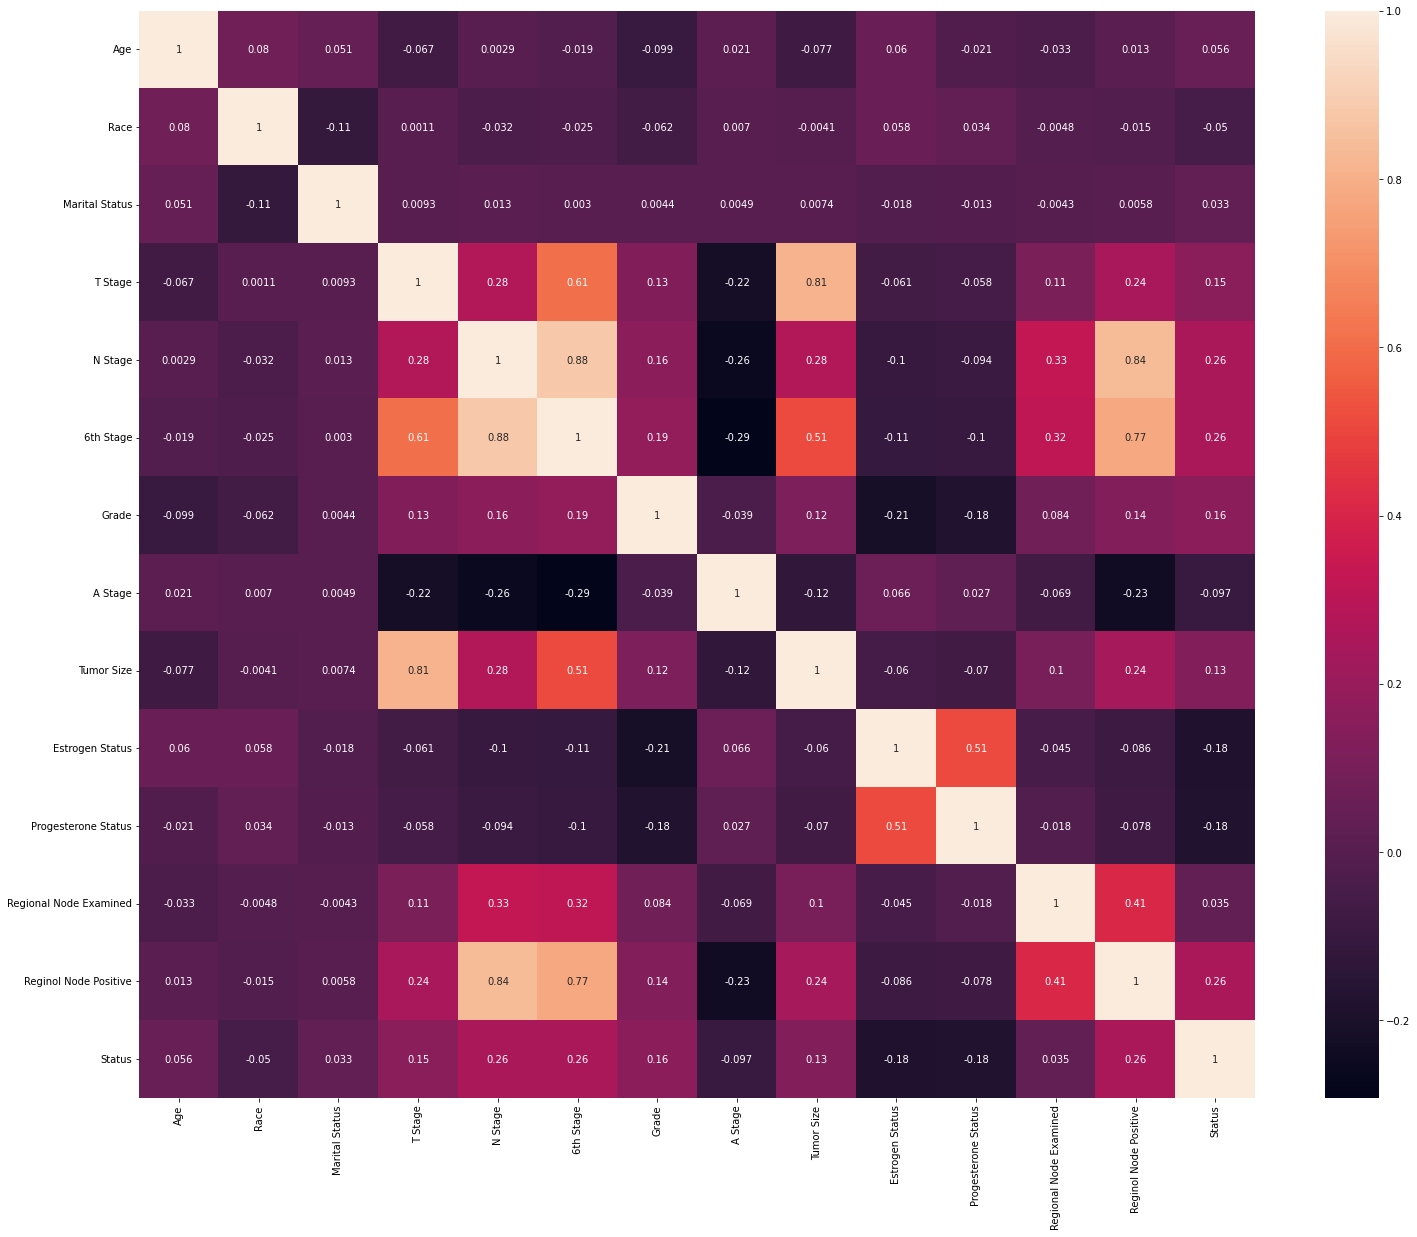

In [ ]:
# draw the heatmap to display the correlation between the features
fig = plt.figure(figsize=(25, 20))
sns.heatmap(df_labeled.corr(), annot=True)
plt.show()

As seen in the above map there are some correlation between the features such as T stage,N satge and 6th stage. We will keep this in mind but will not drop it and do more investigation in EDA.

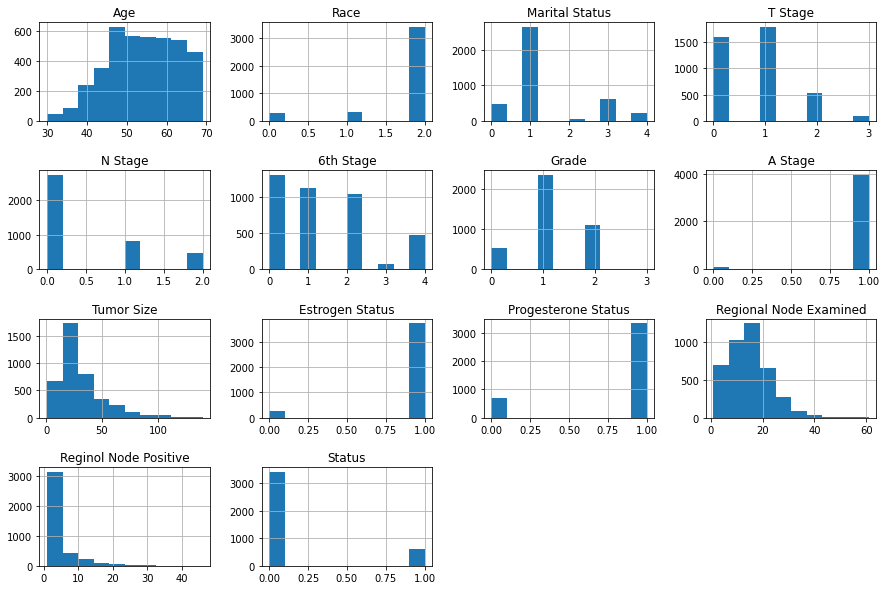

In [ ]:
#Plot distributions of features
df_labeled.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);


# Another method is used to convert categorical data to dummies

Lets explore the Variance Inflation Factor (VIF) for the data above

Summary for: "Race"
   count      %
2   3413  84.82
1    320   7.95
0    291   7.23




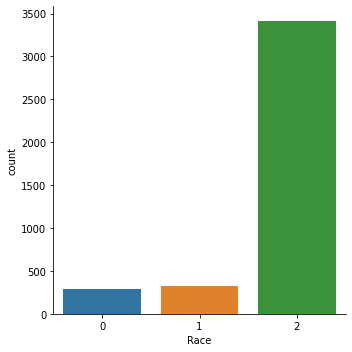

________________________________________________________________________________________________________
Summary for: "Marital Status"
   count      %
1   2643  65.68
3    615  15.28
0    486  12.08
4    235   5.84
2     45   1.12




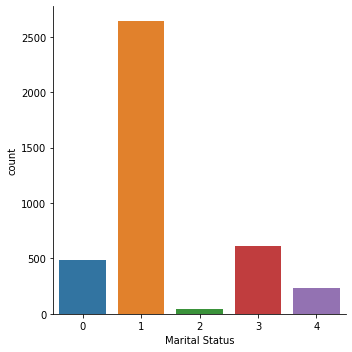

________________________________________________________________________________________________________
Summary for: "T Stage"
   count      %
1   1786  44.38
0   1603  39.84
2    533  13.25
3    102   2.53




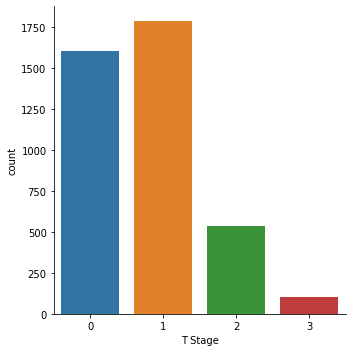

________________________________________________________________________________________________________
Summary for: "N Stage"
   count      %
0   2732  67.89
1    820  20.38
2    472  11.73




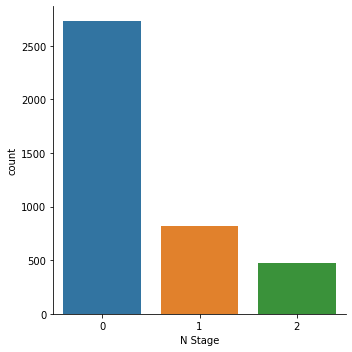

________________________________________________________________________________________________________
Summary for: "6th Stage"
   count      %
0   1305  32.43
1   1130  28.08
2   1050  26.09
4    472  11.73
3     67   1.67




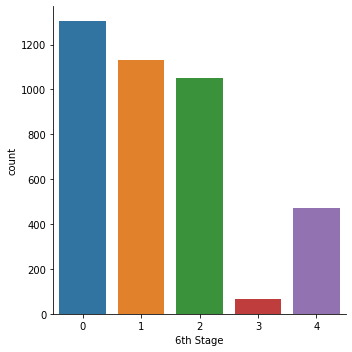

________________________________________________________________________________________________________
Summary for: "Grade"
   count      %
1   2351  58.42
2   1111  27.61
0    543  13.49
3     19   0.47




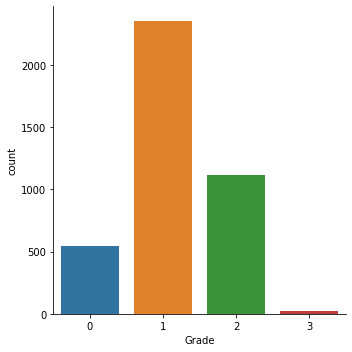

________________________________________________________________________________________________________
Summary for: "A Stage"
   count      %
1   3932  97.71
0     92   2.29




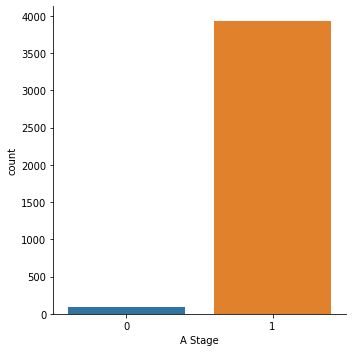

________________________________________________________________________________________________________
Summary for: "Estrogen Status"
   count      %
1   3755  93.32
0    269   6.68




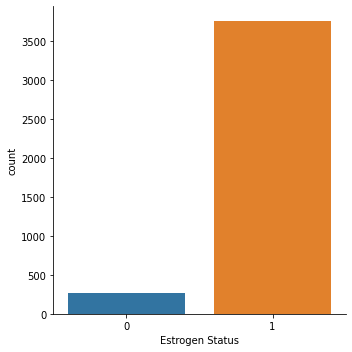

________________________________________________________________________________________________________
Summary for: "Progesterone Status"
   count      %
1   3326  82.65
0    698  17.35




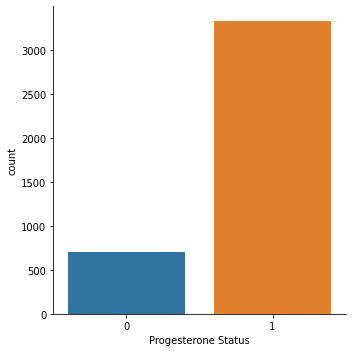

________________________________________________________________________________________________________
Summary for: "Status"
   count      %
0   3408  84.69
1    616  15.31




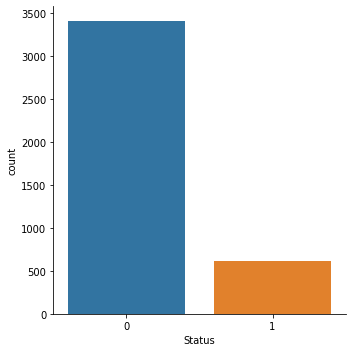

________________________________________________________________________________________________________


In [ ]:
#exploring the summary of all the features
get_summary(df_labeled,['Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage', 'Grade',
       'A Stage', 'Estrogen Status', 'Progesterone Status', 'Status'])

In [ ]:
#save the data
fpath = '/content/drive/My Drive/Springbaord/capston 2 project/data/bc_data_cleaned.csv'
df_labeled.to_csv(fpath, index=False)

## As the data is imbalanced, synthetic data has been created and data is update as below

In [ ]:
fpath = '/content/drive/My Drive/Springbaord/capston 2 project/data/bc_data_synthetic.csv'
df_synth= pd.read_csv(fpath)

In [ ]:
df_synth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6816 entries, 0 to 6815
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     6816 non-null   int64
 1   Race                    6816 non-null   int64
 2   Marital Status          6816 non-null   int64
 3   T Stage                 6816 non-null   int64
 4   N Stage                 6816 non-null   int64
 5   6th Stage               6816 non-null   int64
 6   Grade                   6816 non-null   int64
 7   A Stage                 6816 non-null   int64
 8   Tumor Size              6816 non-null   int64
 9   Estrogen Status         6816 non-null   int64
 10  Progesterone Status     6816 non-null   int64
 11  Regional Node Examined  6816 non-null   int64
 12  Reginol Node Positive   6816 non-null   int64
 13  Survival Months         6816 non-null   int64
 14  Status                  6816 non-null   int64
dtypes: int64(15)
memory u

Summary for: "Status"
   count     %
1   3408  50.0
0   3408  50.0




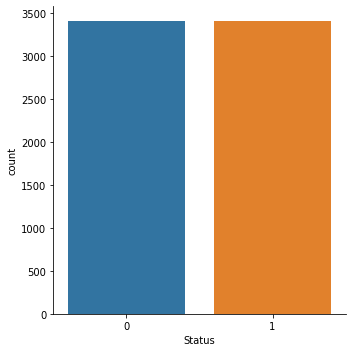

________________________________________________________________________________________________________


In [ ]:
#exploring the summary of all the features after combined with synthetic data
get_summary(df_synth,['Status'])

As seen in the above graphs the data has been balanced correctly.

In [15]:
#functions used in this notebook

#function to get the unique values for each featur
def get_summary(df,features):
    for entry in features:
        print('Summary for: "' + entry + '"')
        output = pd.DataFrame({'count':df[entry].value_counts()})
        output['%'] = round(100* (output['count']/len(df[entry])),2)
        print(output)
        print('\n')
        sns.catplot(x=entry,data=df,kind="count")
        #plt.xticks(rotation=90)
        plt.show()
        print('________________________________________________________________________________________________________')

# function to drop one column of the same category in df
def drop_one_column(df,features,df_dummies):
  df_columns_droped= df_dummies.copy()
  for entry in features:
    dropping_column = df[entry].unique()[0]
    df_columns_droped.drop(df_columns_droped[[entry +'_'+ dropping_column]],axis = 1,inplace = True)
  return df_columns_droped  


# function to calculate VIF
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)


